# Apprenticeship Learning via IRL - Deep Q Learning

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import gym
from dqn import DQNTrainer

## Cartpole-v0

Observations

Num | Observation | Min | Max
---|---|---|---
0 | Cart Position | -4.8 | 4.8
1 | Cart Velocity | -Inf | Inf
2 | Pole Angle | ~ -0.418 rad (-24&deg;) | ~ 0.418 rad (24&deg;)
3 | Pole Velocity At Tip | -Inf | Inf

Actions:
Num | Action
--- | ---
0 | Push cart to the left
1 | Push cart to the right


Environment : CartPole-v0

Observation Space: Box(4,)

Action Space:  Discrete(2)

Initial State:  [-0.01160915 -0.00551315 -0.02886458  0.01276303]

A step in the env: (array([-0.01171941,  0.19001061, -0.02860932, -0.28888545]), 1.0, False, {})


Rendered Environment: 


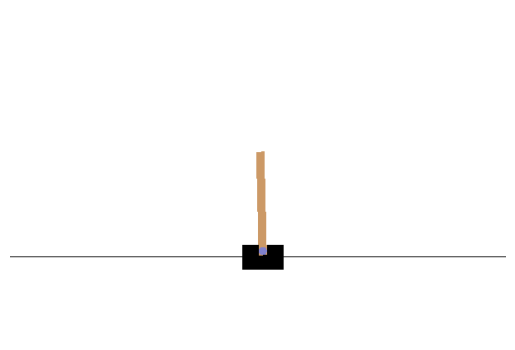

In [2]:
env = gym.make('CartPole-v0')
print('\nEnvironment : CartPole-v0')
print('\nObservation Space:', env.observation_space)
print('\nAction Space: ', env.action_space)
print('\nInitial State: ',env.reset())
print('\nA step in the env:', env.step(1))
print('\n\nRendered Environment: ')
env.reset()
plt.axis('off')
plt.imshow(env.render(mode='rgb_array'))
env.close()
plt.show()

# Training - Obtain Expert Policy

1. **Initialization:**
   - Use two neural networks: `policy_net` (online) and `target_net`.
   - Utilize a replay memory (`ReplayMemory`) to store experiences.

2. **Experience Replay:**
   - Store transitions (state, action, next state, reward) in the replay memory during interactions.

3. **Sample Batch:**
   - Periodically, sample a random batch of experiences from the replay memory.

4. **Double Q-Learning Update:**
   - Use `policy_net` to select actions for the next states in the sampled batch.
   - Use `target_net` to evaluate Q-values for the selected actions, addressing overestimation.

5. **Compute Loss:**
   - Calculate the loss using Huber loss between predicted Q-values and expected Q-values.
   - Expected Q-values are computed using `target_net` for the next states and considering discounted future rewards.

6. **Optimization:**
   - Minimize the computed loss using an optimizer, updating `policy_net` parameters via backpropagation.
   - Optionally apply gradient clipping for stability.

7. **Update Target Network:**
   - Periodically update `target_net` by copying weights from `policy_net`.

8. **Repeat:**
   - Repeat steps 2-7 over multiple episodes and iterations.

- The Double DQN approach mitigates overestimation bias in traditional Q-learning, improving stability and performance in deep reinforcement learning agents. The policy is represented by the Q-value function learned by the neural network.

In [3]:
dqn_trainer = DQNTrainer(env, agent='Expert', num_episodes=200, save_path='../Results/DQN/Expert_Training')

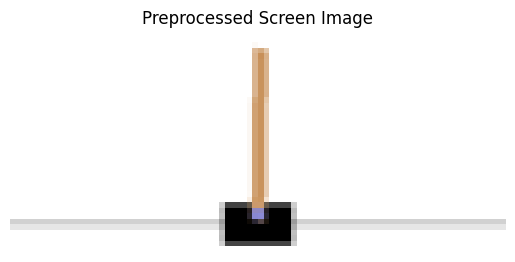

In [4]:
# the screen image from the environment is pre-processed before input to the neural network

dqn_trainer.show_screen_image()


Training Complete.


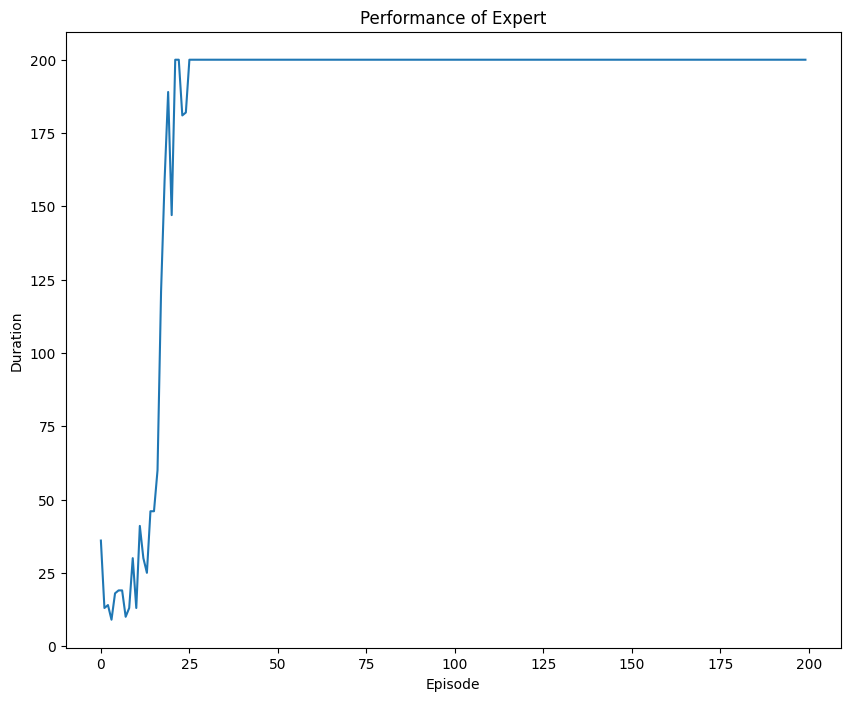

In [5]:
dqn_trainer.dqn_train(plot_save_path='../Results/DQN/Expert Performance.png')

In [6]:
dqn_trainer.save_trained_model()

Saved  ./data/Expert.pt


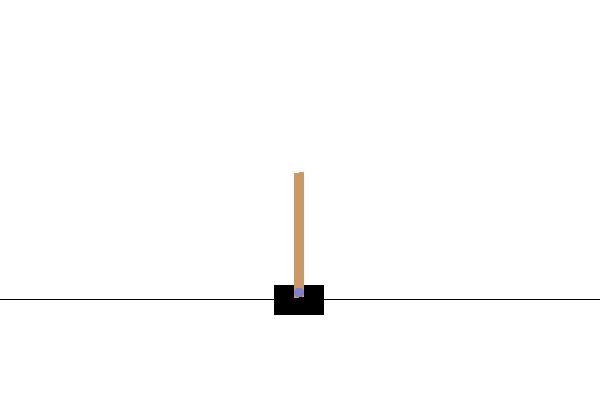

Expert Reward:  200.0


In [7]:
# visualize policy

expert_reward = dqn_trainer.test_model(dqn_trainer.best_model, render_save_path='../Results/DQN/Expert Policy.gif')
print('Expert Reward: ',expert_reward)